Relaxing the BEC...


evolving the dGPE: 100%|██████████████████████| 100/100 [00:02<00:00, 48.66it/s]


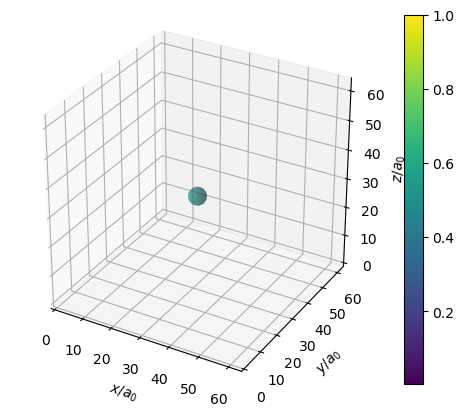

In [1]:
import sys
sys.path.append('/Users/jonasronning/Documents/Work/Numerics/Old Projects/ComFiT')

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf


bec = cf.BEC(3,xRes=64,yRes=64,zRes=64,gamma=0,dt=0.1)

bec.V0 = bec.calc_gaussian_stirring_potential(2,4,[bec.xmid,bec.ymid,bec.zmid])

bec.conf_initial_condition_Thomas_Fermi()
bec.evolve_relax_BEC(100)

bec.plot_field(np.abs(bec.psi)**2)
plt.show()


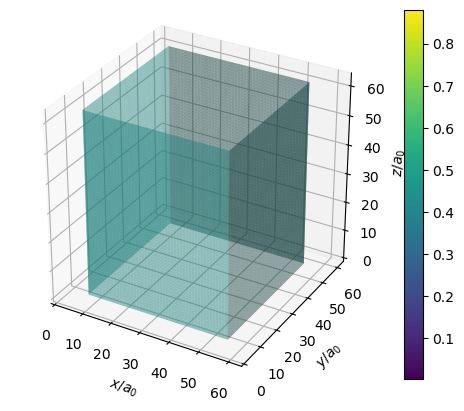

In [2]:
bec.conf_dissipative_frame(wx=25,wy=25,wz=25)

bec.plot_field(bec.gamma)
plt.show()

evolving the dGPE in the comoving frame: 0it [00:00, ?it/s]


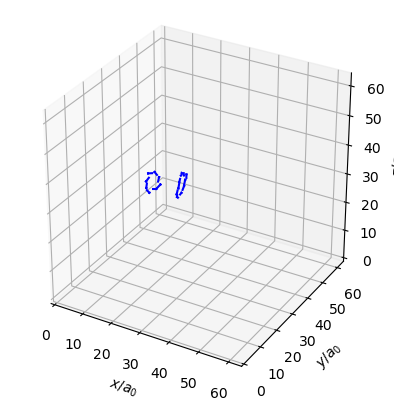

In [4]:
bec.psi += (0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)+ 0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)*(1j))*np.abs(bec.psi)**2
bec.psi_f = np.fft.fftn(bec.psi)
vel_x = 0.8

t_max = 0

timesteps = int(t_max/bec.dt)


bec.evolve_comoving_dGPE(timesteps,vel_x,method='ETD4RK')


nodes =  bec.calc_vortex_nodes()    

#ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False)
bec.plot_vortex_nodes(nodes)
plt.show()